In [184]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize

In [185]:
# Set plotting style
plt.style.use('dark_background')
sns.set_palette("cubehelix")

In [186]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\71548\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\71548\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [187]:
# Load the dataset
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)

In [188]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB
None


In [189]:
# Display the count of articles in each category
category_counts = df['category'].value_counts()
print(category_counts)

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

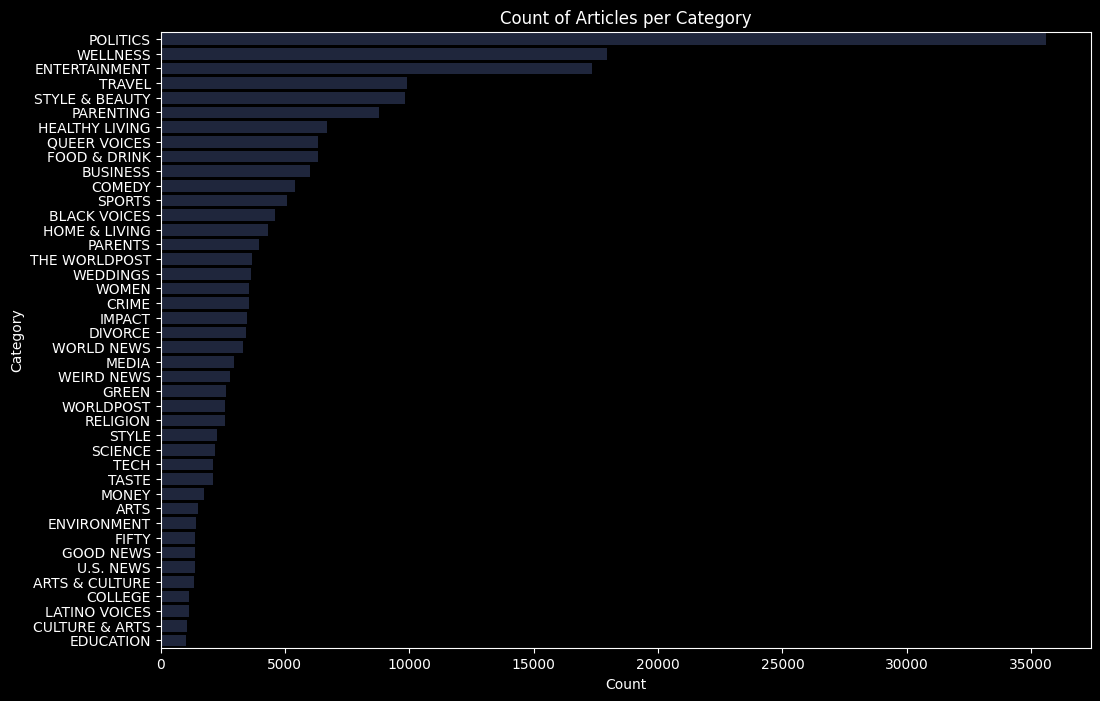

In [190]:
# Visualize the count of articles in each category
plt.figure(figsize=(12, 8))
sns.countplot(y=df['category'], order=category_counts.index)
plt.title('Count of Articles per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [191]:
# Identify the top 10 categories by article count
top_categories = df['category'].value_counts().nlargest(10).index

In [192]:
# Filter the dataset to keep only the top 10 categories
df = df[df['category'].isin(top_categories)]

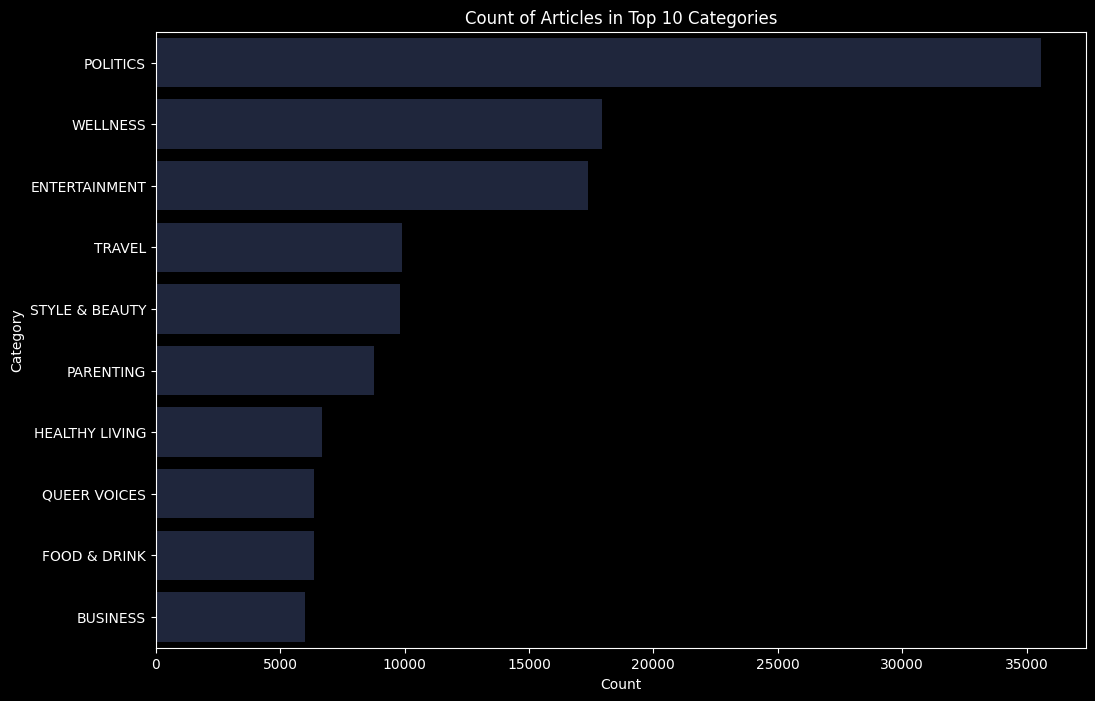

In [193]:
# Visualize the filtered count of articles in each of the top 10 categories
plt.figure(figsize=(12, 8))
sns.countplot(y=df['category'], order=top_categories)
plt.title('Count of Articles in Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [194]:
# Define a set of stop words
stop_words = set(stopwords.words('english'))

In [195]:
# Function to clean text by removing stop words
def clean_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

In [196]:
# Apply the cleaning function to the headlines and descriptions
df['cleaned_text'] = (df['headline'] + ' ' + df['short_description']).apply(clean_text)


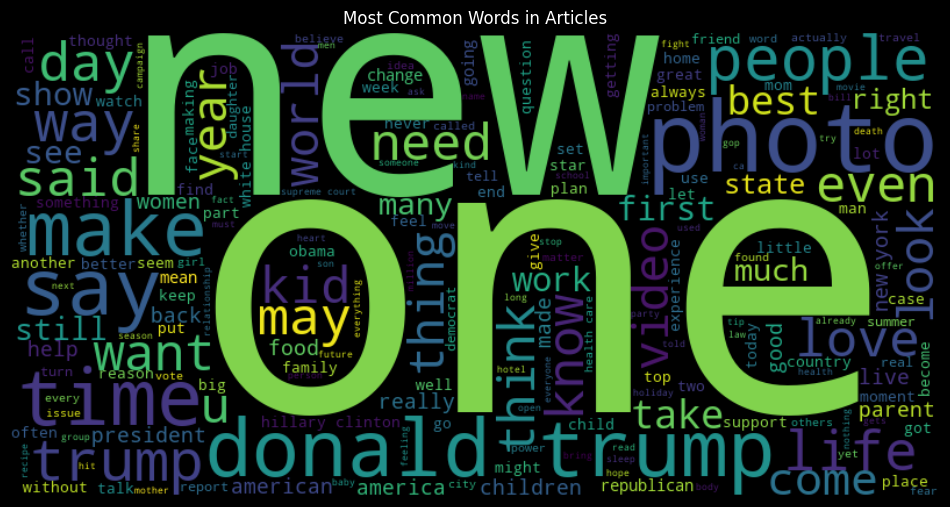

In [197]:
# Visualize the most common words using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Articles')
plt.show()

In [198]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [199]:
# Vectorize the cleaned text
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [200]:

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])

In [201]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
# Initialize and train the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [213]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [214]:
# Evaluate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction accuracy: {accuracy:.2f}')

Prediction accuracy: 0.78


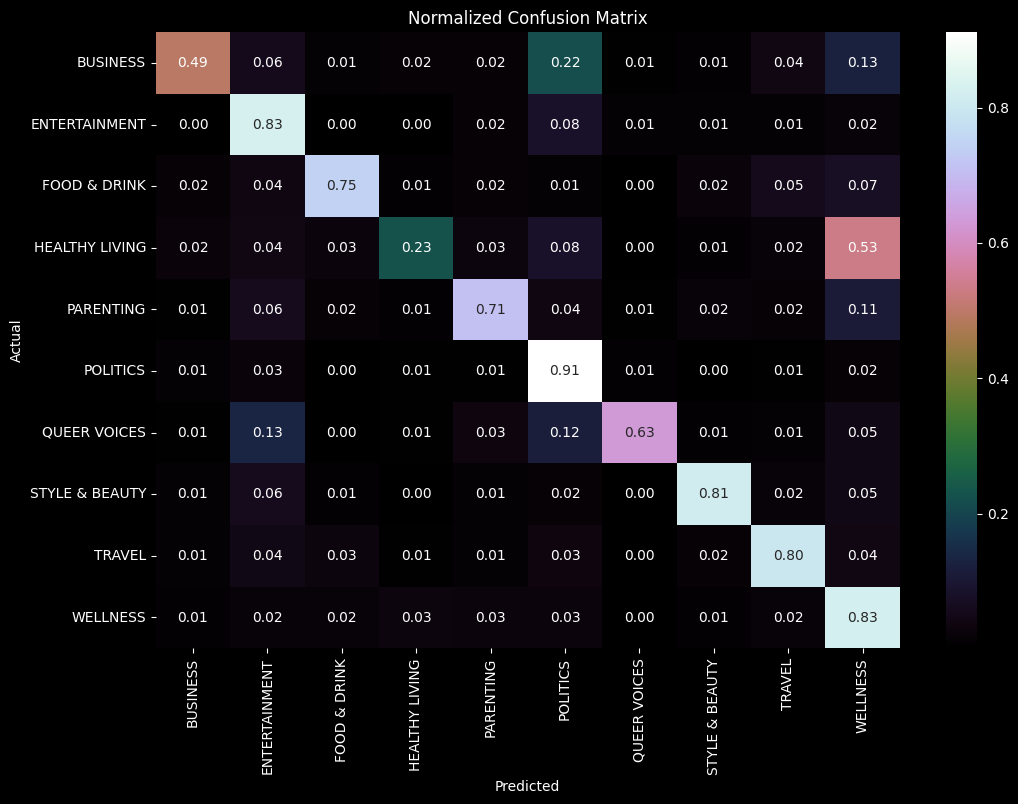

In [215]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='cubehelix')
plt.title('Normalized Confusion Matrix', color='white')
plt.xlabel('Predicted', color='white')
plt.ylabel('Actual', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [216]:
# Display the classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                precision    recall  f1-score   support

      BUSINESS       0.66      0.49      0.57      1147
 ENTERTAINMENT       0.76      0.83      0.79      3429
  FOOD & DRINK       0.78      0.75      0.76      1276
HEALTHY LIVING       0.57      0.23      0.32      1395
     PARENTING       0.76      0.71      0.74      1804
      POLITICS       0.86      0.91      0.88      7164
  QUEER VOICES       0.83      0.63      0.72      1297
STYLE & BEAUTY       0.87      0.81      0.84      1924
        TRAVEL       0.79      0.80      0.80      1979
      WELLNESS       0.65      0.83      0.72      3543

      accuracy                           0.78     24958
     macro avg       0.75      0.70      0.71     24958
  weighted avg       0.77      0.78      0.77     24958



In [217]:
# Implement the search function
def search(query, top_n=10):
    query_cleaned = clean_text(query)
    query_vectorized = tfidf_vectorizer.transform([query_cleaned])
    similarities = np.dot(X, query_vectorized.T).toarray().flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    return df.iloc[top_indices], similarities[top_indices]

In [218]:
# Example search query
query = "Lifestyle"
results, similarities = search(query)

In [219]:
# Display the search results
for i, (index, row) in enumerate(results.iterrows()):
    print(f"Similarity: {similarities[i]:.2f}, Category: {row['category']}, Headline: {row['headline']}, Description: {row['short_description']}")

Similarity: 0.62, Category: WELLNESS, Headline: Moving Beyond Generalized Lifestyle Intervention Into Personalized Lifestyle Medicine, Description: At first, I was a bit surprised to see this conclusion. After all, how can anyone argue with the therapeutic impact of lifestyle -- the basics of healthy eating and increased physical activity --  for the reduction of chronic disease?
Similarity: 0.55, Category: WELLNESS, Headline: Dean Ornish Talks Lifestyle As Treatment At NYC's Integrative Healthcare Symposium, Description: The million-dollar question, of course, is how to motivate patients to make lasting changes in their lifestyle. They found
Similarity: 0.54, Category: POLITICS, Headline: The Person Overseeing Domestic Issues For Trump's Transition Thinks Being Gay Is A Choice, Description: “I think homosexuality is a lifestyle, it’s a choice, and that lifestyle can be changed."
Similarity: 0.54, Category: HEALTHY LIVING, Headline: HuffPost Is Hiring A Lifestyle Trends Writer, Descrip

In [220]:
# Visualize the search results
def visualize_search_results(results, similarities):
    results['similarity'] = similarities
    plt.figure(figsize=(12, 8))
    sns.barplot(x=results['similarity'], y=results['category'], order=results['category'].value_counts().index)
    plt.title('Search Results: Similarity Scores by Category')
    plt.xlabel('Similarity Score')
    plt.ylabel('Category')
    plt.show()

C:\Users\71548\AppData\Local\Temp\ipykernel_2212\3413574280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['similarity'] = similarities


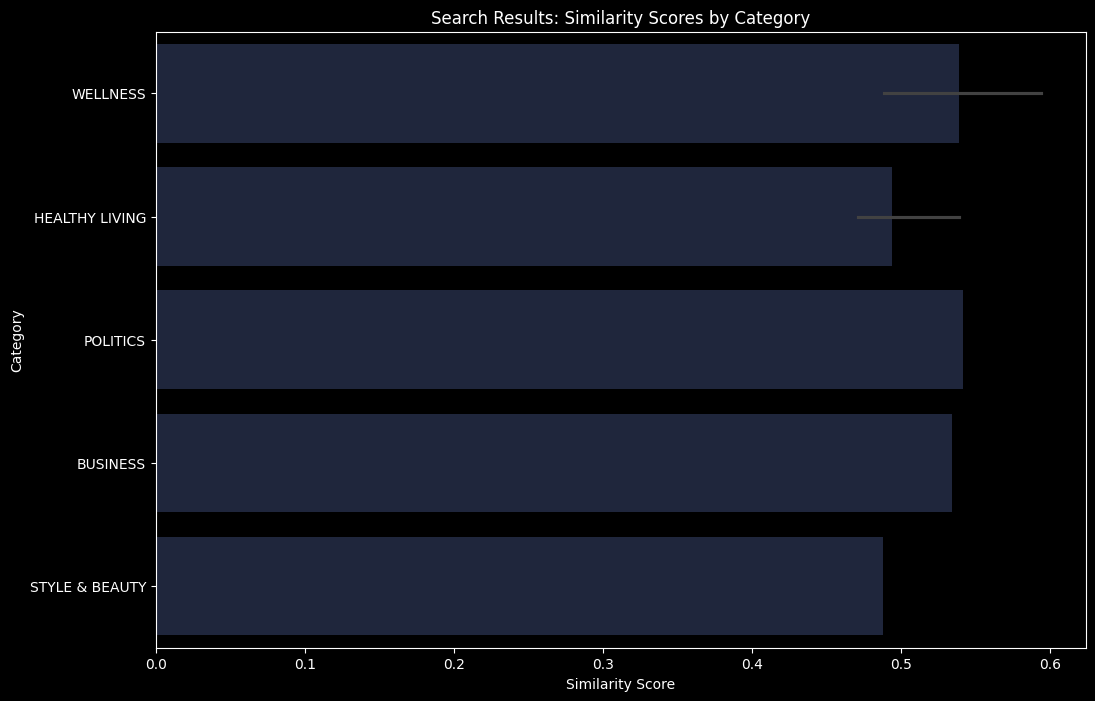

In [221]:
# Visualize the search results with similarity scores
visualize_search_results(results, similarities)